In [1]:
from pathlib import Path
import os

ROOT = Path("/Users/Admin/Desktop/PARA-OS/01_Projects/Learning-Design-ML-Systems/Data-augmentation-DMLS")

if ROOT.is_dir():
    print(f"ROOT directory exists hence changing directory to '{ROOT.name}'")
    os.chdir(ROOT)
else:
    raise NotADirectoryError

ROOT directory exists hence changing directory to 'Data-augmentation-DMLS'


In [2]:
import torch # noqa
from torchvision import transforms # noqa
from PIL import Image # noqa
import matplotlib.pyplot as plt # noqa
# import torchvision.transforms as transforms
from torchvision.models import resnet50 # noqa



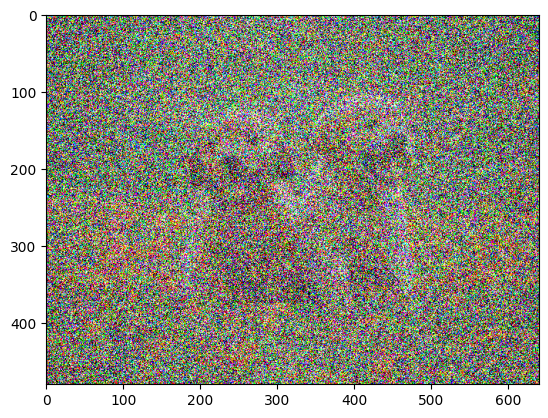

In [3]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load an image
image = Image.open(ROOT / "sample_data/puppies.jpg")

# Convert the image to a tensor
transform = transforms.ToTensor()
image = transform(image)

# Generate random noise
noise = torch.randn(image.size())

# Add the noise to the image
noisy_image = image + noise

# Clip the values of the noisy image to be between 0 and 1
noisy_image = torch.clamp(noisy_image, 0., 1.)

# Convert the tensor back to an image
transform = transforms.ToPILImage()
noisy_image = transform(noisy_image)

# Display the image
plt.imshow(noisy_image)
plt.show()

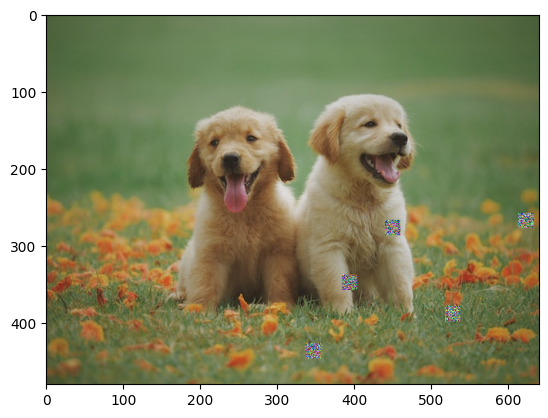

In [4]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load an image
image = Image.open(ROOT / "sample_data/puppies.jpg")

# Convert the image to a tensor
transform = transforms.ToTensor()
image = transform(image)

# Define the size of the patch and the number of patches
patch_size = (20, 20)  # height, width
num_patches = 5

# Apply the patches
for _ in range(num_patches):
    # Generate random coordinates for the top-left corner of the patch
    x = torch.randint(0, image.size(1) - patch_size[0], (1,)).item()
    y = torch.randint(0, image.size(2) - patch_size[1], (1,)).item()

    # Generate a random patch
    patch = torch.rand((3, *patch_size))

    # Apply the patch
    image[:, x:x+patch_size[0], y:y+patch_size[1]] = patch

# Convert the tensor back to an image
transform = transforms.ToPILImage()
patched_image = transform(image)

# Display the image
plt.imshow(patched_image)
plt.show()

use Lambda transform to apply the custom patches

In [10]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None, save_dir=None):
        self.root_dir = root_dir
        self.transform = transform
        self.save_dir = save_dir
        self.image_files = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        if self.save_dir:
            save_path = os.path.join(self.save_dir, self.image_files[idx])
            image.save(save_path)

        return image

# Define the size of the patch and the number of patches
patch_size = (100, 100)  # height, width
num_patches = 5

# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: add_patches(x, patch_size, num_patches)),
    transforms.ToPILImage()
])

def add_patches(image, patch_size, num_patches):
    for _ in range(num_patches):
        # Generate random coordinates for the top-left corner of the patch
        x = torch.randint(0, image.size(1) - patch_size[0], (1,)).item()
        y = torch.randint(0, image.size(2) - patch_size[1], (1,)).item()

        # Generate a random patch
        patch = torch.rand((3, *patch_size))

        # Apply the patch
        image[:, x:x+patch_size[0], y:y+patch_size[1]] = patch

    return image

resulant_dir_path = ROOT / 'resultant_images'
resulant_dir_path.mkdir(exist_ok=True, parents=True)
# Create the dataset
dataset = CustomDataset(root_dir=ROOT/ "sample_data", transform=transform, save_dir=ROOT / 'resultant_images')


In [11]:
for _ in dataset:
    pass